# Kelompok 4_Final Project 3

Nama Kelompok: 
1. Karina Jeanne Natasya
2. Maulida Afifah
3. Kenny Oktavianus U Sibarani

# Project Overview

### Latar Belakang
Clustering adalah mengelompokkan objek-objek berdasarkan karakteristik yang dimiliki masing-masing objek untuk mendukung sistem pengambilan keputusan dan data mining. Analisis faktor yang mempengaruhi pengelompokan data kedalam kelompok dengan karakteristik sama dan memiliki karakteristik berbeda dapat memberikan wawasan penting untuk pengembangan intervensi atau metode clustering yang lebih baik. Oleh karena itu Dataset "CC GENERAL" dipilih sebagai sumber data untuk mempelajari dan memahami metode algoritma clustering karena terdapat banyak customer dengan pola penggunaan kartu kredit yang berbeda beda, sehingga nantinya customer dapat dikelompokkan dengan pola karakteristiknya.

### Data yang Digunakan
Dataset "CC GENERAL" berasal dari platform Kaggle. Data dalam dataset ini dikumpulkan dari transaksi pengguna kartu kredit dari 9000 orang selama 6 bulan. Dataset ini berisi 18 kolom. Berikut adalah penjelasan singkat tentang setiap kolom:

    1. CUSTID - Identifikasi pemegang Kartu Kredit (Kategorikal)
    2. BALANCE - Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian
    3. BALANCEFREQUENCY - Seberapa sering Saldo diperbarui, nilai antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)
    4. PURCHASES - Jumlah pembelian yang dilakukan dari akun
    5. ONEOFFPURCHASES - Jumlah pembelian maksimum yang dilakukan dalam sekali transaksi
    6. INSTALLMENTSPURCHASES - Jumlah pembelian yang dilakukan secara cicilan
    7. CASHADVANCE - Uang tunai di muka yang diberikan oleh pengguna
    8. PURCHASESFREQUENCY - Seberapa sering Pembelian dilakukan, beri skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)
    9. ONEOFFPURCHASESFREQUENCY - Seberapa sering Pembelian dilakukan dalam sekali belanja (1 = sering dibeli, 0 = tidak sering dibeli)
    10. PURCHASESINSTALLMENTSFREQUENCY - Seberapa sering pembelian secara cicilan yang dilakukan (1 = sering dilakukan, 0 = tidak sering dilakukan)
    11. CASHADVANCEFREQUENCY - Seberapa sering pembayaran uang muka dilakukan
    12. CASHADVANCETRX - Jumlah Transaksi yang dilakukan dengan "Uang Muka"
    13. PURCHASESTRX - Jumlah transaksi pembelian yang dilakukan
    14. CREDITLIMIT - Batas Kartu Kredit untuk pengguna
    15. PAYMENTS - Jumlah Pembayaran yang dilakukan oleh pengguna
    16. MINIMUM_PAYMENTS - Jumlah minimum pembayaran yang dilakukan oleh pengguna
    17. PRCFULLPAYMENT - Persentase pembayaran penuh yang dibayarkan oleh pengguna
    18. TENURE - Jangka waktu layanan kartu kredit untuk pengguna

    
### Object yang ingin dicapai
Tujuan dari analisis ini adalah untuk mengembangkan model prediktif yang dapat mengelompokkan customer ke beberapa kelompok berdasarkan karakteristik penggunaan kartu kredit yang tertera pada dataset. Dengan memanfaatkan atribut-atribut seperti jumlah transaksi, pembayaran, jumlah saldo dan faktor lainnya, kami bertujuan untuk mengidentifikasi faktor-faktor yang paling berpengaruh dalam mengelompokkan customer berdasarkan penggunaan kartu kredit ke beberapa kelompok.

Final Project 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:
- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu mengimplementasikan Clustering pada data yang diberikan


# Import Liblary

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# Data Loading

In [5]:
# Import dataset 
card = pd.read_csv('CC GENERAL.csv')

In [6]:
# Menampilkan 10 dataset teratas
card.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [7]:
# Mengecek Dimensi dataset
card.shape

(8950, 18)

Dataset memiliki 18 kolom dan 8950 baris

In [8]:
# Menampilkan info setiap kolom
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Beberapa kolom pada dataset masih memiliki missing value

In [9]:
# Nilai unik pada setiap kolom
card.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

# Data Cleaning
### Membersihkan Missing Value


In [10]:
# Mengecek jumlah missing value disetiap kolom
card.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Kolom 'MINIMUM_PAYMENTS' terdapat banyak missing value. Data tersebut dapat ditangani dengan menghilangkan kolom/baris tertentu, memasukkan nilai, atau menggantikan nilai pada baris dengan rata rata nilai pada kolom.

In [11]:
card = card.dropna()

In [12]:
# Mengecek kembali dataset yang sudah dibersihkan dari missing value
card.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
# Mengecek kembali dimensi dataset
card.shape

(8636, 18)

In [14]:
# Mengecek info dataset
card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

### Membersihkan Data Duplikat

In [15]:
card.duplicated().sum()

0

Tidak terdapat data duplikat pada dataset

In [16]:
card.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [17]:
card.describe(include='object')

,CUST_ID
count,8636
unique,8636
top,C10001
freq,1


Data sudah dibersihkan dari missing value dan nilai duplikat, selanjutnya dapat dilakukan eksplorasi data lebih lanjut. 

# Eksplorasi Data

In [18]:
# Memisahkan kolom data numerik
numerik_col = [var for var in card.columns if card[var].dtype=='float']
numerik_col

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT']

In [19]:
card_num = card[numerik_col]
card_num.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,7500.0,622.066742,627.284787,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,1200.0,678.334763,244.791237,0.000000
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,1800.0,1400.057770,2407.246035,0.000000


In [20]:
# Melihat deskripsi setiap data numerik
round(card_num.describe())

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,8636.0,8636.0,8636.0,8636.0,8636.0,8636.0,8636.0,8636.0,8636.0,8636.0,8636.0,8636.0,8636.0,8636.0
mean,1601.0,1.0,1025.0,605.0,421.0,994.0,0.0,0.0,0.0,0.0,4522.0,1784.0,864.0,0.0
std,2096.0,0.0,2167.0,1684.0,917.0,2121.0,0.0,0.0,0.0,0.0,3659.0,2910.0,2373.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0
25%,148.0,1.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1600.0,419.0,169.0,0.0
50%,917.0,1.0,375.0,45.0,95.0,0.0,0.0,0.0,0.0,0.0,3000.0,897.0,312.0,0.0
75%,2105.0,1.0,1146.0,599.0,484.0,1132.0,1.0,0.0,1.0,0.0,6500.0,1951.0,825.0,0.0
max,19043.0,1.0,49040.0,40761.0,22500.0,47137.0,1.0,1.0,1.0,2.0,30000.0,50721.0,76406.0,1.0


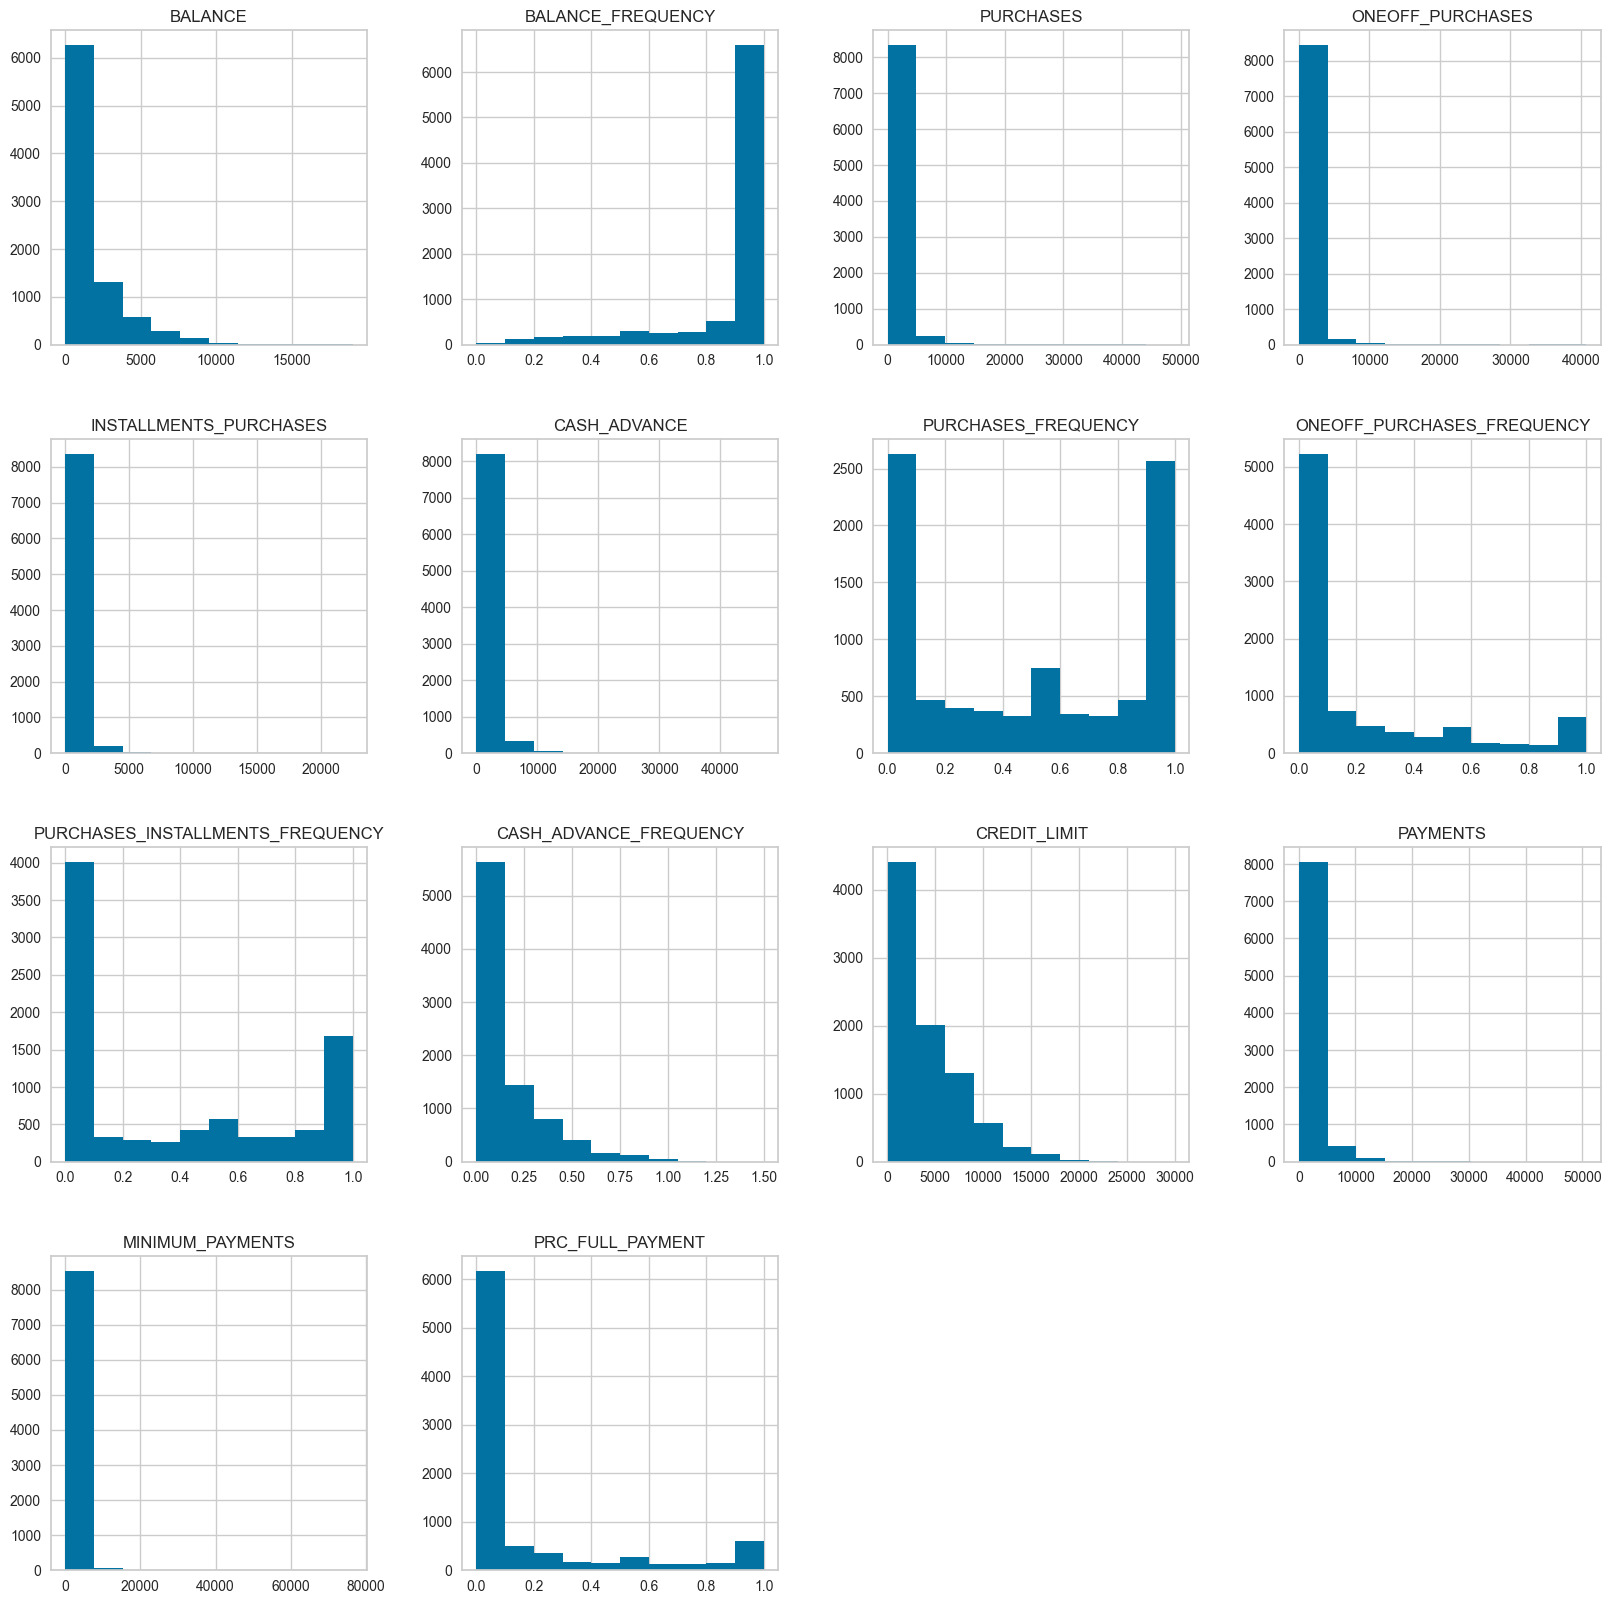

In [21]:
# Visualisasi kolom numerik
card_num.hist(bins=10, figsize = (20,20))
plt.show()

### Correlation Analysis

In [22]:
# Melihat korelasi antar kolom data numerik 
card_num_cor = card_num.corr()
card_num_cor

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
BALANCE,1.000000,0.310140,0.176083,0.159985,0.122109,0.495586,-0.088459,0.063832,-0.069582,0.445307,0.535518,0.322830,0.398669,-0.333594
BALANCE_FREQUENCY,0.310140,1.000000,0.122635,0.095254,0.114739,0.089036,0.228158,0.187467,0.184159,0.181132,0.087682,0.039169,0.132519,-0.156961
PURCHASES,0.176083,0.122635,1.000000,0.916780,0.679259,-0.053760,0.393000,0.497384,0.316025,-0.124863,0.358425,0.606782,0.093842,0.176447
ONEOFF_PURCHASES,0.159985,0.095254,0.916780,1.000000,0.329650,-0.033244,0.265460,0.524514,0.128380,-0.086413,0.320613,0.570850,0.048741,0.129890
INSTALLMENTS_PURCHASES,0.122109,0.114739,0.679259,0.329650,1.000000,-0.066099,0.441193,0.211829,0.511130,-0.136455,0.258057,0.385391,0.132156,0.178440
CASH_ADVANCE,0.495586,0.089036,-0.053760,-0.033244,-0.066099,1.000000,-0.218566,-0.090111,-0.178873,0.629030,0.304161,0.459342,0.140094,-0.158566
PURCHASES_FREQUENCY,-0.088459,0.228158,0.393000,0.265460,0.441193,-0.218566,1.000000,0.502123,0.862338,-0.316771,0.121372,0.100715,0.002979,0.305393
ONEOFF_PURCHASES_FREQUENCY,0.063832,0.187467,0.497384,0.524514,0.211829,-0.090111,0.502123,1.000000,0.143911,-0.118225,0.295432,0.244346,-0.030357,0.154073
PURCHASES_INSTALLMENTS_FREQUENCY,-0.069582,0.184159,0.316025,0.128380,0.511130,-0.178873,0.862338,0.143911,1.000000,-0.268924,0.063421,0.083424,0.030036,0.249547
CASH_ADVANCE_FREQUENCY,0.445307,0.181132,-0.124863,-0.086413,-0.136455,0.629030,-0.316771,-0.118225,-0.268924,1.000000,0.132841,0.182340,0.098844,-0.260001


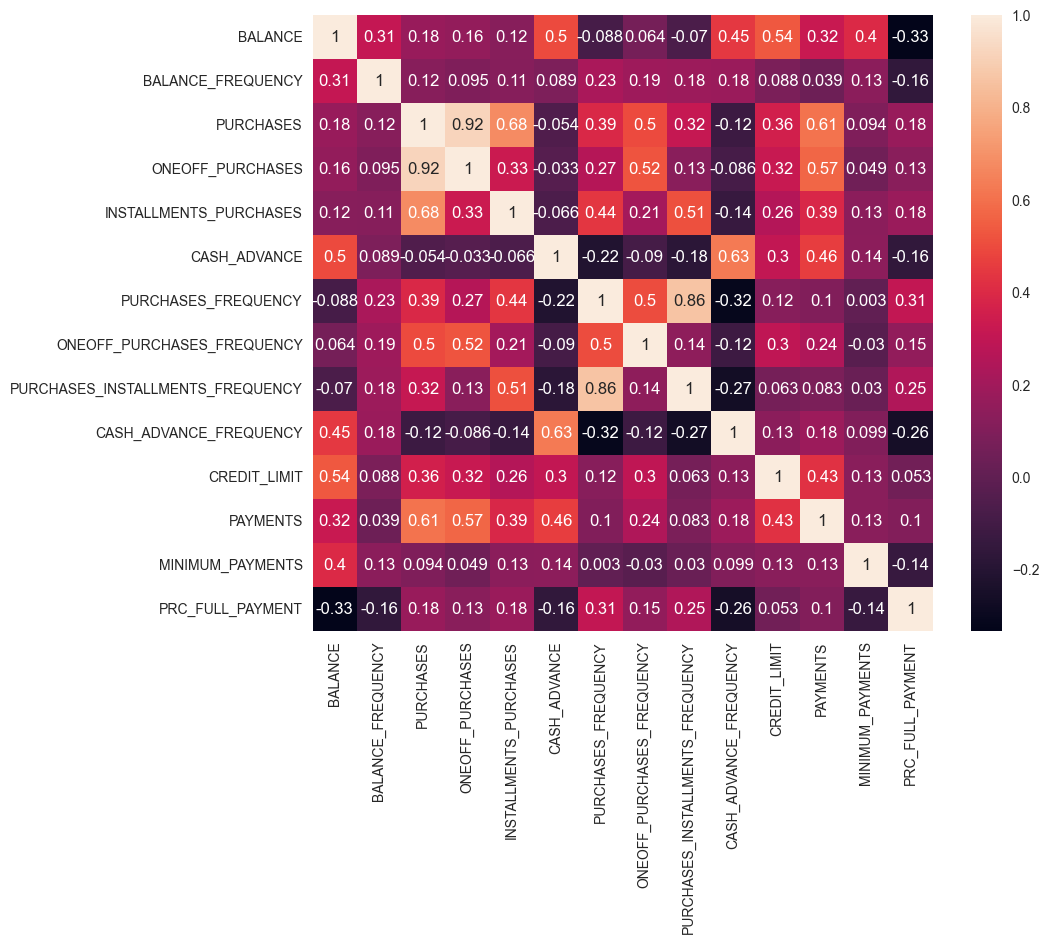

In [23]:
# Memvisualisasikan korelasi data numerik dengan heatmap
plt.figure(figsize=(10,8))

sns.heatmap(card_num_cor, annot=True)
plt.show()

### Analisis PURCHASE

In [24]:
cor_purchases = abs(card_num_cor["PURCHASES"])
cor_purchases[cor_purchases>0.5].sort_values(ascending=False)

PURCHASES                 1.000000
ONEOFF_PURCHASES          0.916780
INSTALLMENTS_PURCHASES    0.679259
PAYMENTS                  0.606782
Name: PURCHASES, dtype: float64

In [25]:
print('{0:.2f}%'.format(100*sum(card.PURCHASES == card.ONEOFF_PURCHASES + card.INSTALLMENTS_PURCHASES)/card.shape[0]))

94.36%


In [26]:
card[card.PURCHASES != card.ONEOFF_PURCHASES + card.INSTALLMENTS_PURCHASES].head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
50,C10052,4931.331857,1.000000,901.42,646.07,255.35,8530.648614,0.625000,0.375000,0.250000,0.875000,37,9,12000.0,8113.297346,1012.415961,0.000000,8
71,C10074,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.485760,0.666667,0.500000,0.583333,0.833333,27,33,7000.0,28232.694460,1107.030803,0.454545,12
82,C10086,3.786310,0.636364,133.05,28.20,104.85,0.000000,0.416667,0.166667,0.250000,0.000000,0,5,12000.0,210.053432,99.533735,0.444444,12
86,C10090,7069.950386,1.000000,1603.78,1445.14,158.64,5626.004046,1.000000,0.833333,1.000000,0.750000,23,23,11000.0,4589.873897,1876.262988,0.000000,12
110,C10115,156.216753,0.818182,1354.86,585.63,769.23,0.000000,0.916667,0.333333,0.833333,0.000000,0,34,5500.0,858.976682,108.319927,0.000000,12


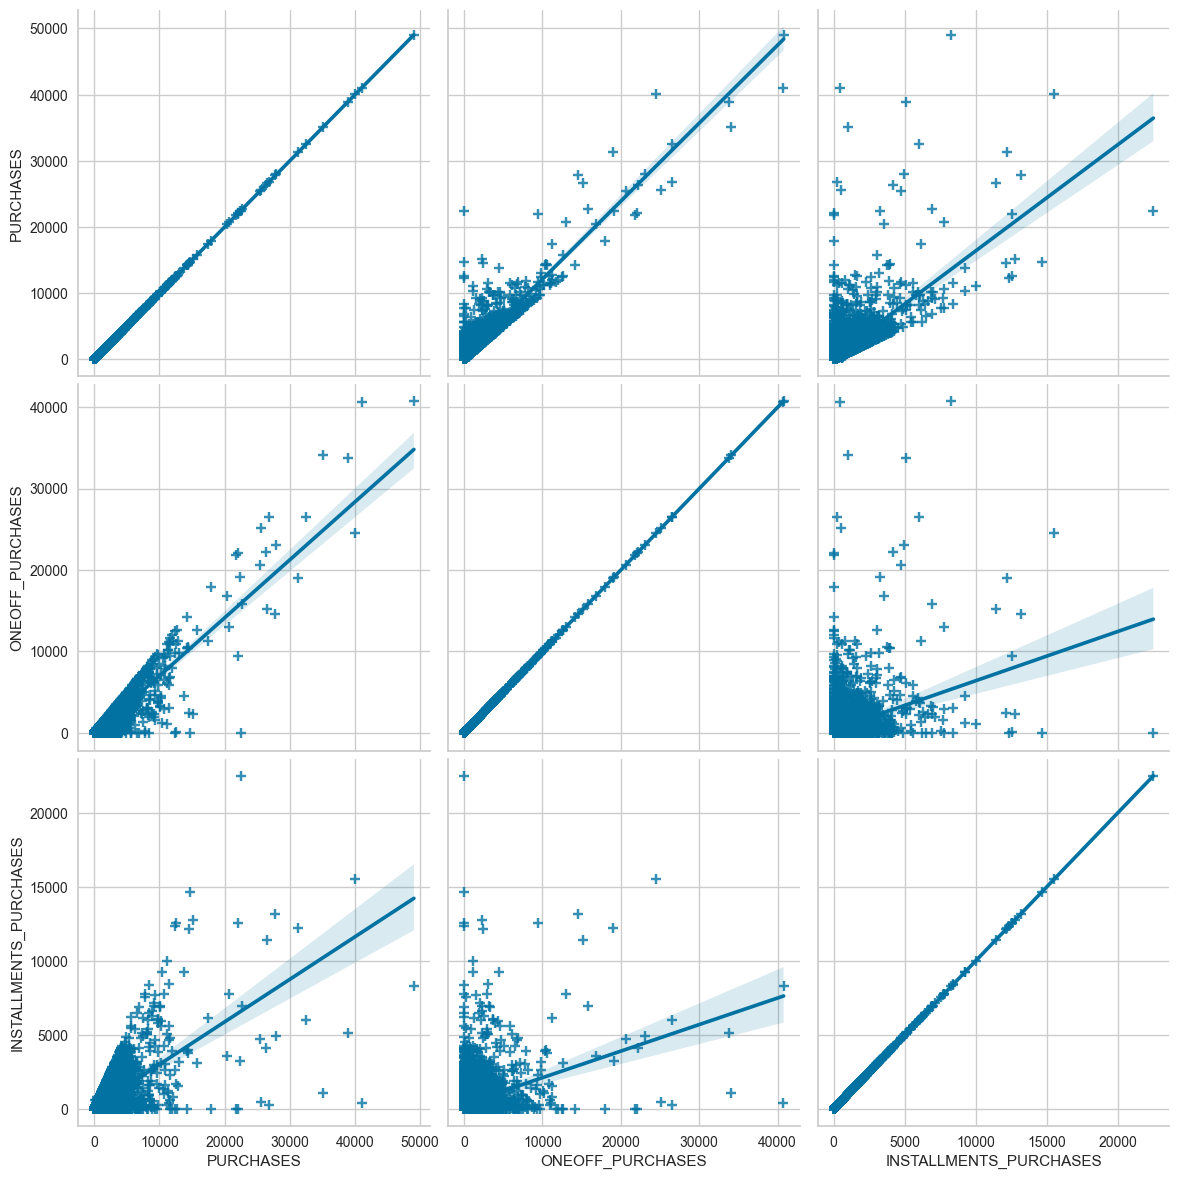

In [27]:
sns.pairplot(card[['PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']],
             markers="+",
             kind='reg',
             diag_kind=None, 
             height=4)

### Analisis CASH_ADVANCE

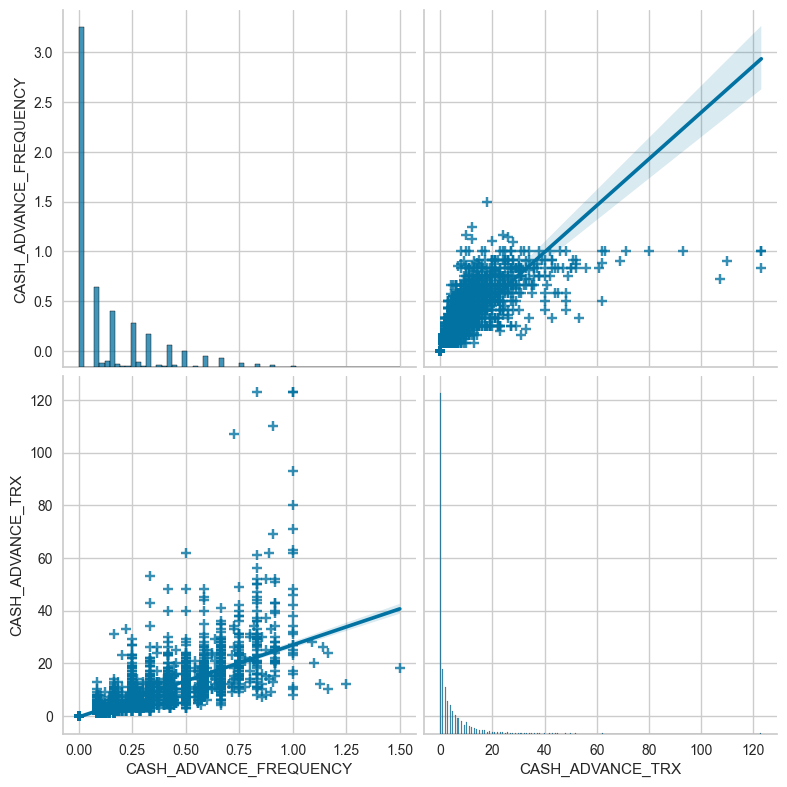

In [28]:
sns.pairplot(card[['CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX']],
             markers="+",
             kind='reg',
             height=4)

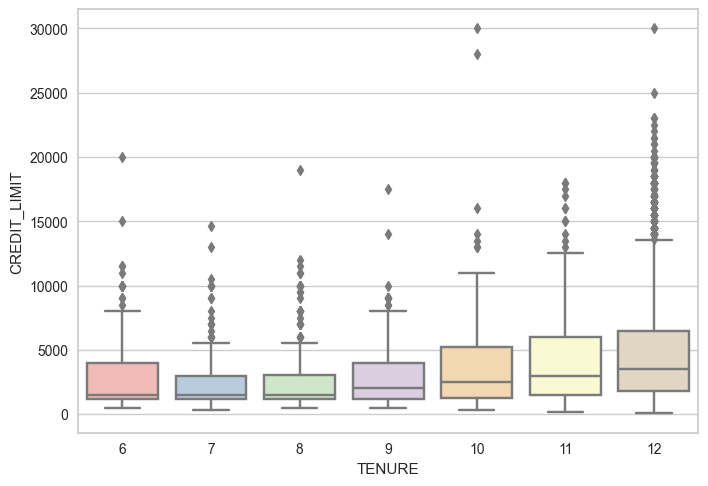

In [29]:
# Hubungan antara variabel 'TENURE' dan 'CREDIT_LIMIT' 
sns.boxplot(x = 'TENURE', y = 'CREDIT_LIMIT', data = card,palette='Pastel1');

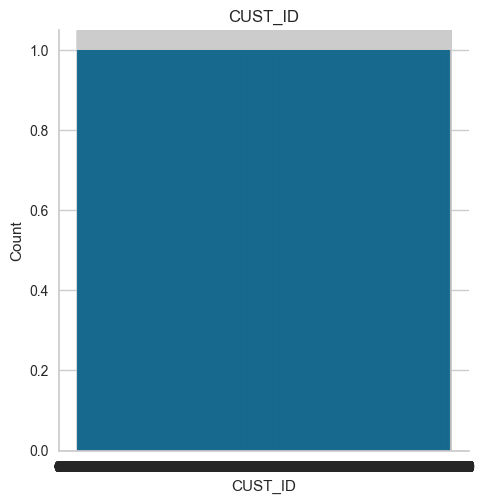

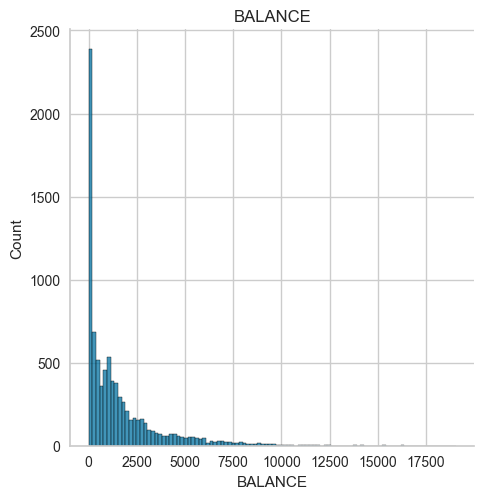

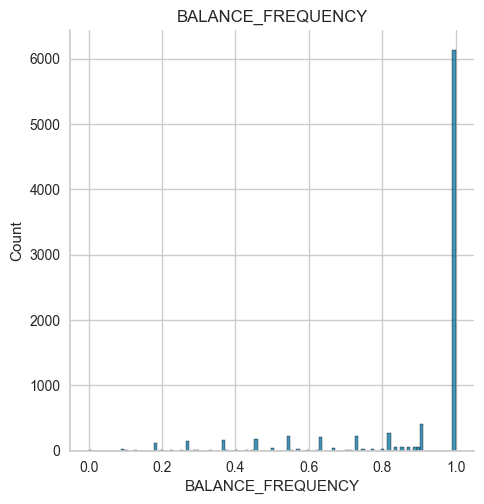

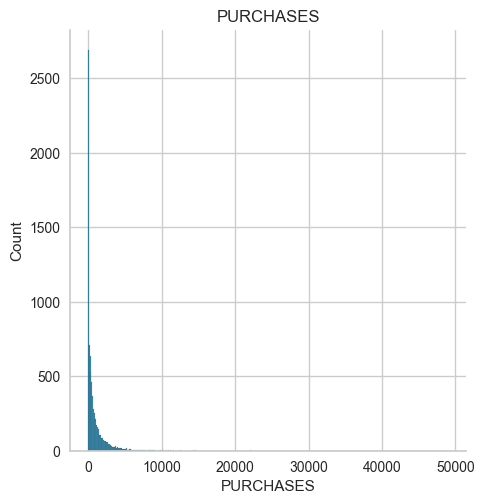

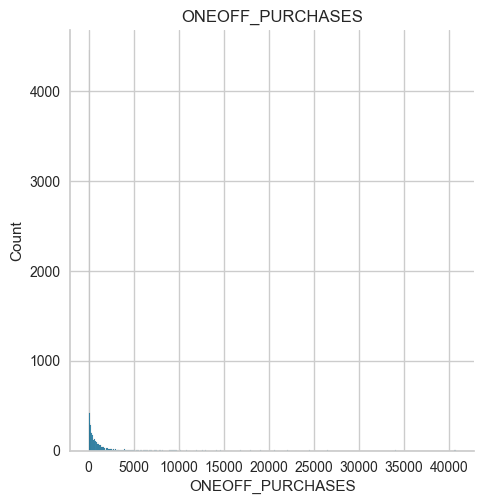

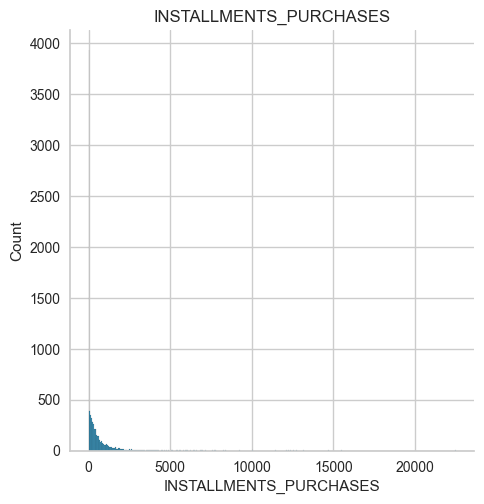

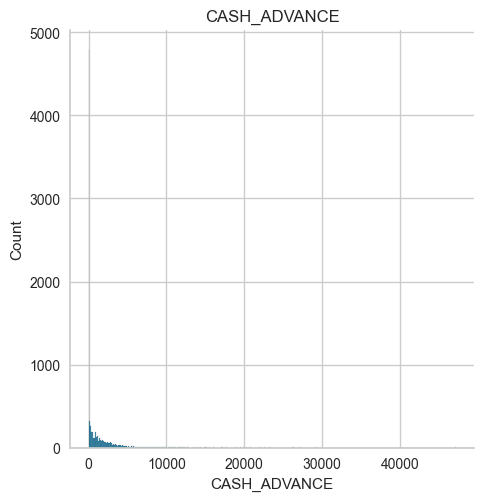

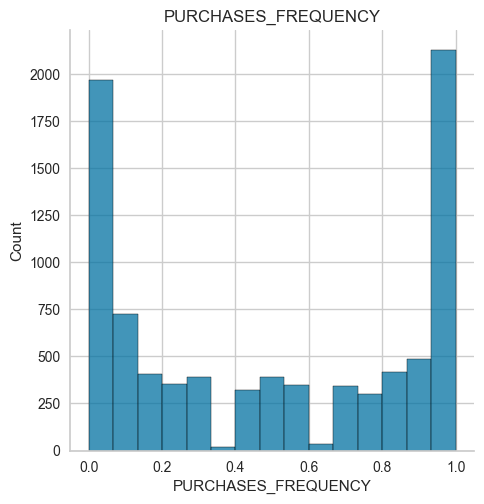

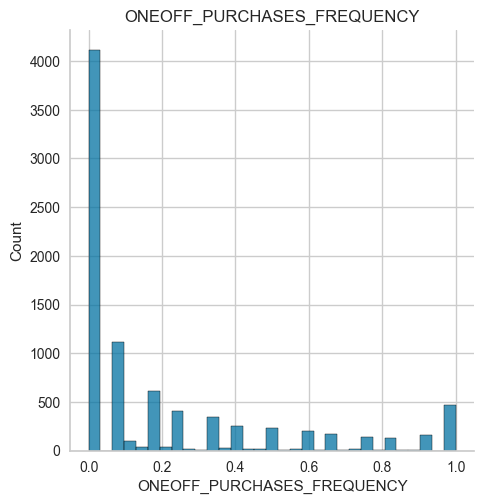

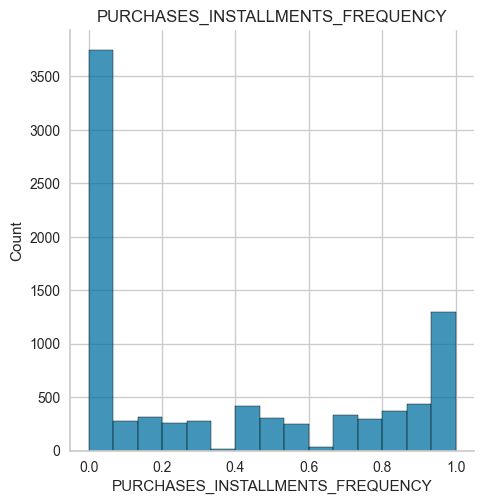

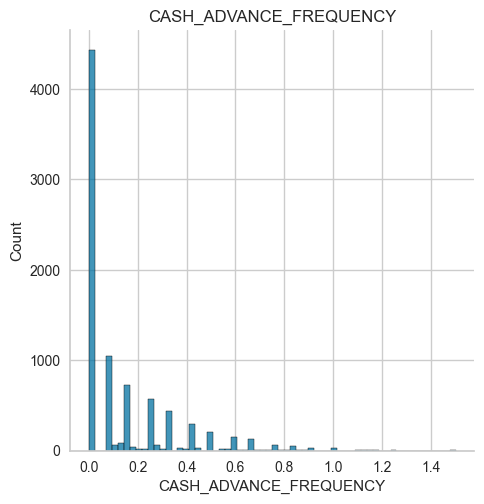

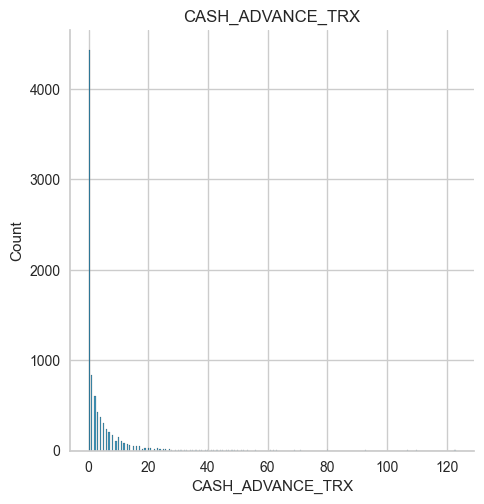

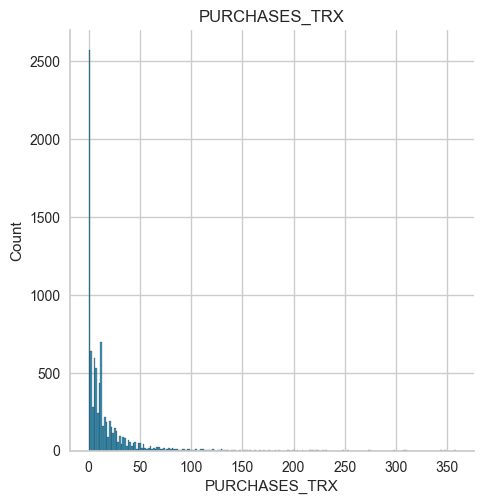

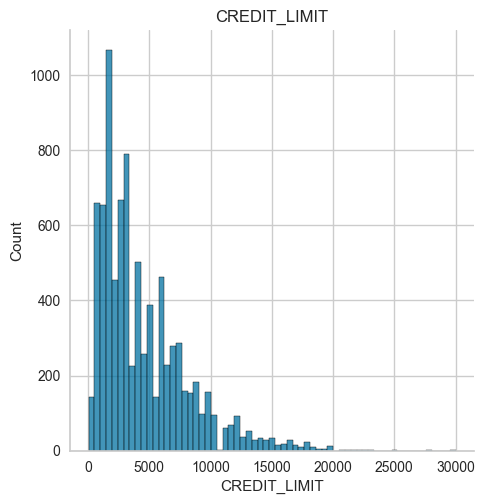

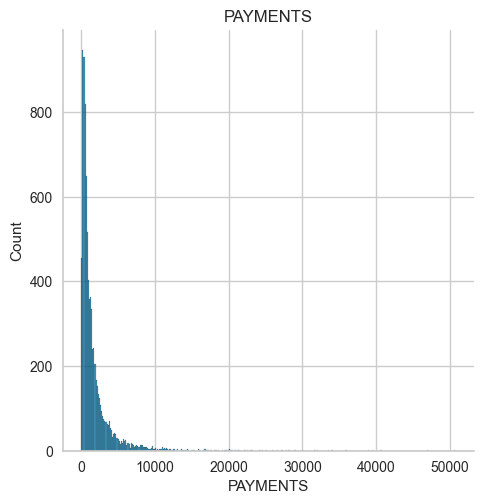

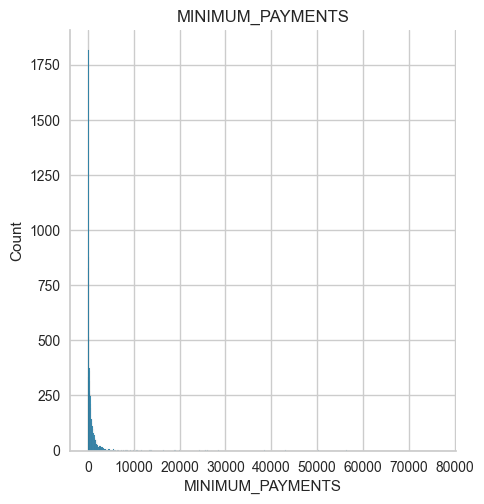

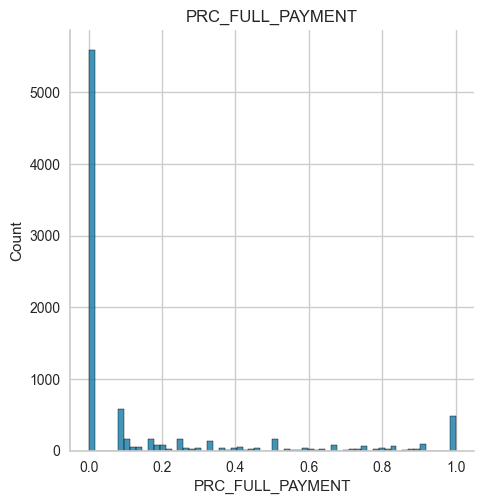

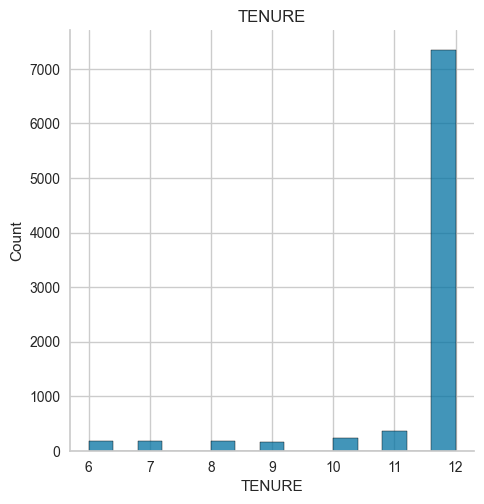

In [30]:
# distribusi dengan distplot
for i in card:
    sns.displot(x = i, data = card)
    plt.title(i)

# Preprocessing Data

In [31]:
# Menghapus kolom unik untuk Analisis
card = card.drop(columns = 'CUST_ID')

### Outlier

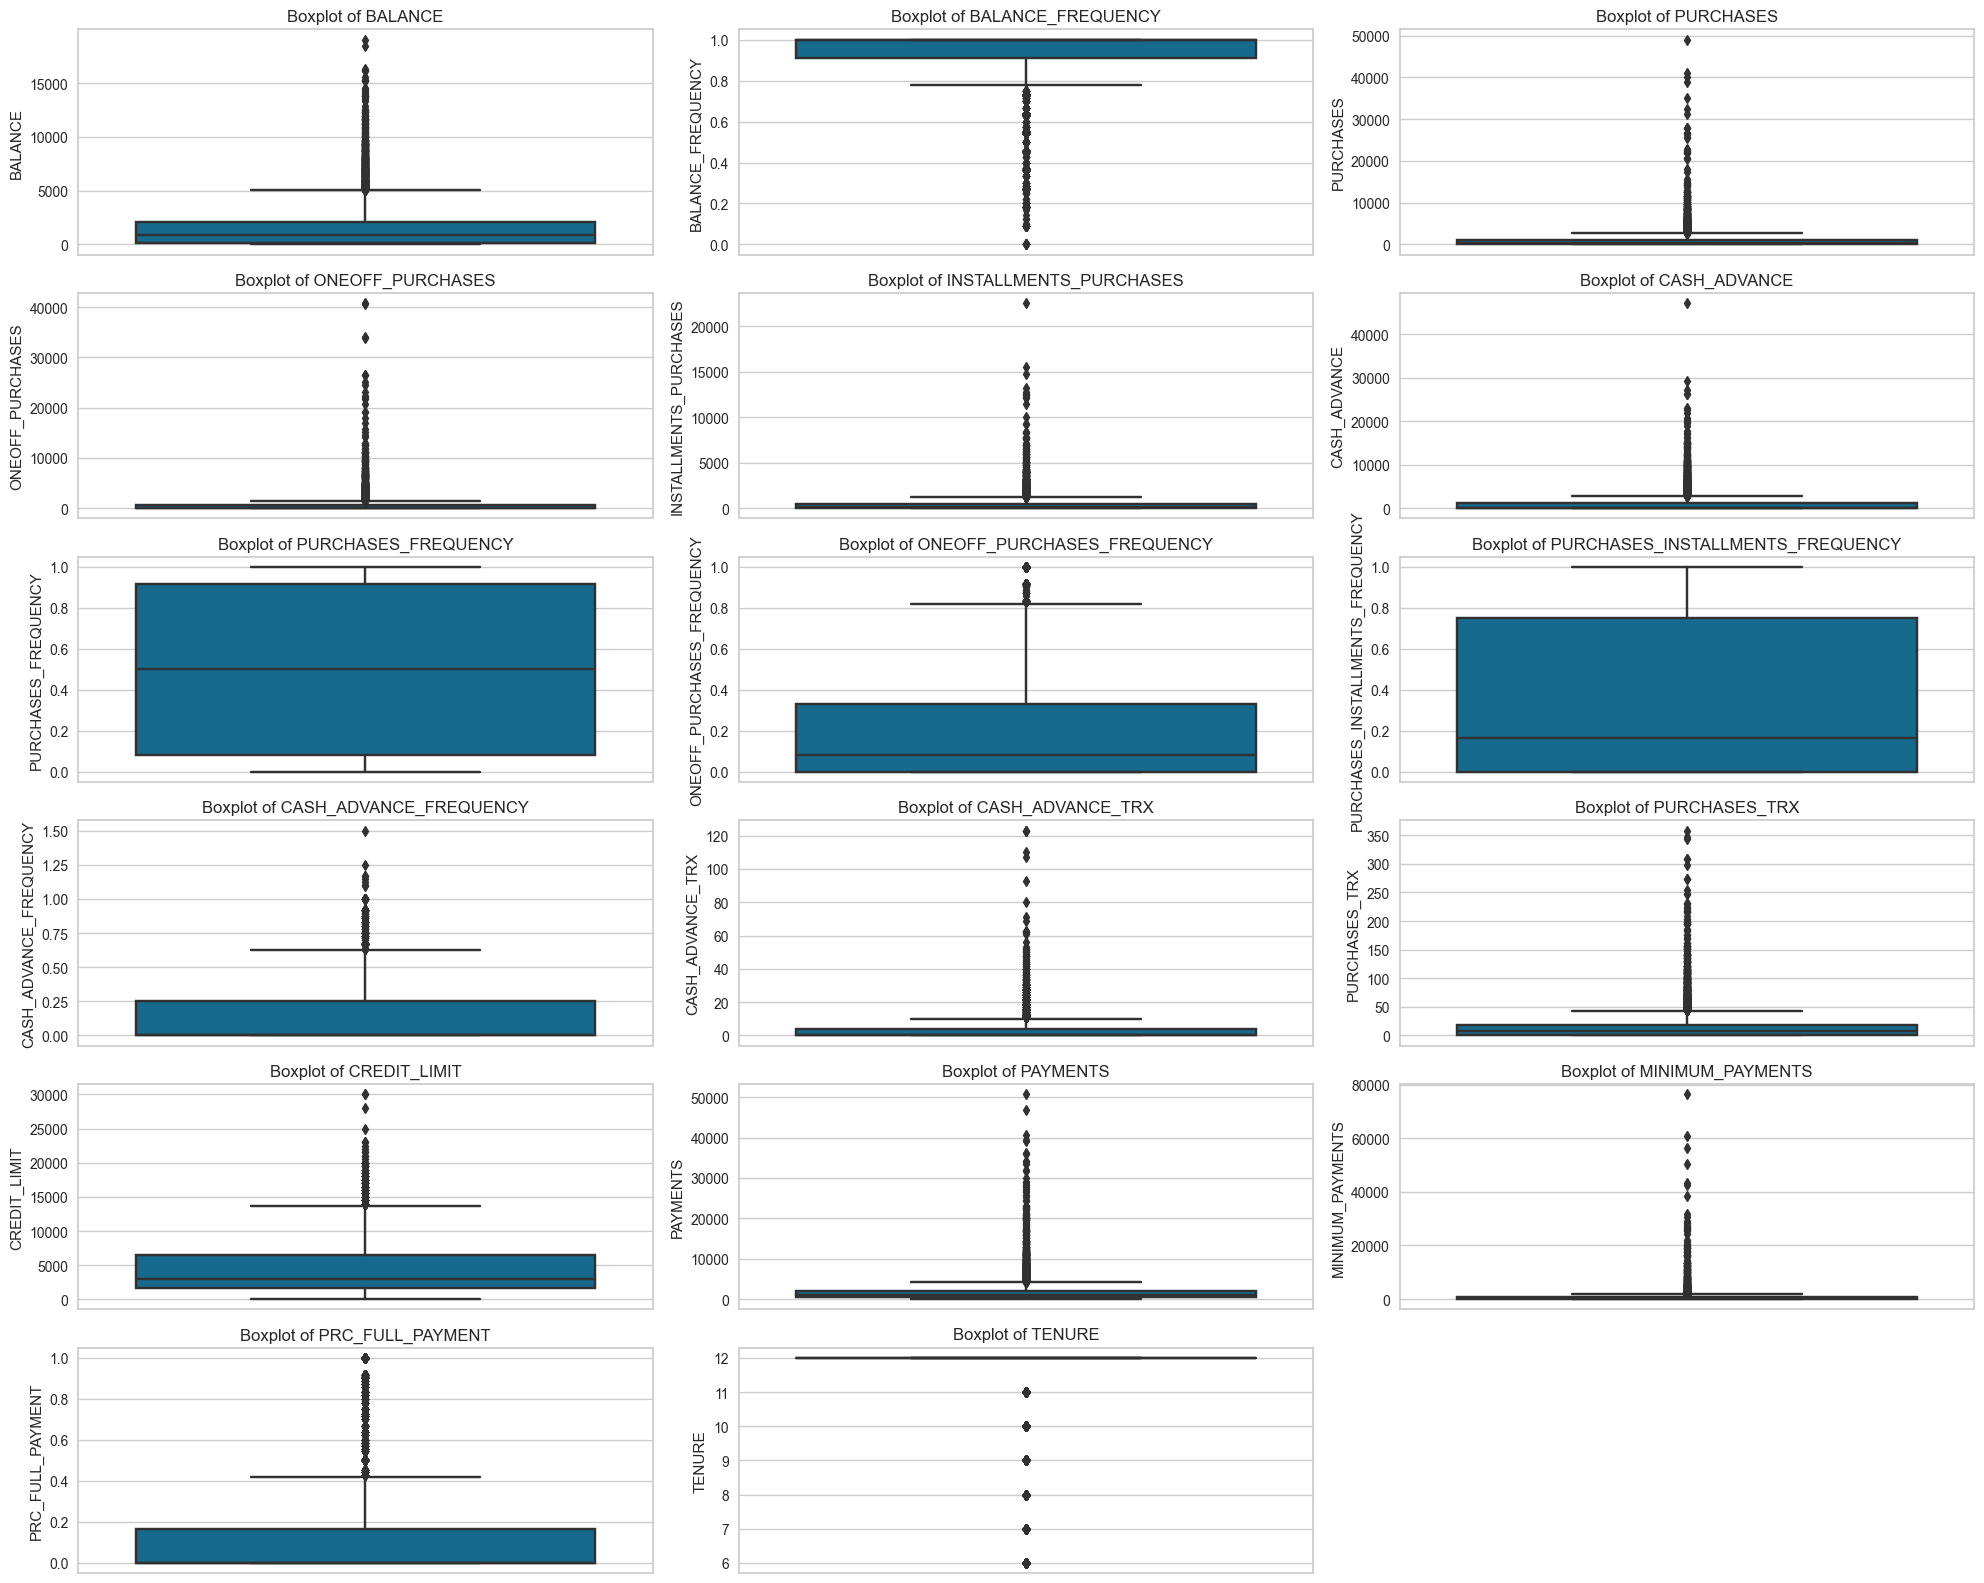

In [32]:
plt.figure(figsize = (20,16))
Features = card.columns
for i in range(len(Features)):
    plt.subplot(6,3, i + 1)
    sns.boxplot(y = card[Features[i]], data = card)
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()

Terdapat Outlier pada semua field kecuali: URCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY.

### Menghapus Outlier

In [33]:
def detect_outliers(col):
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [34]:
Feature_list = card.columns
for i in Feature_list:
    lr, ur = detect_outliers(card[i])
    card[i] = np.where(card[i] > ur, ur,card[i])
    card[i] = np.where(card[i] < lr, lr,card[i])

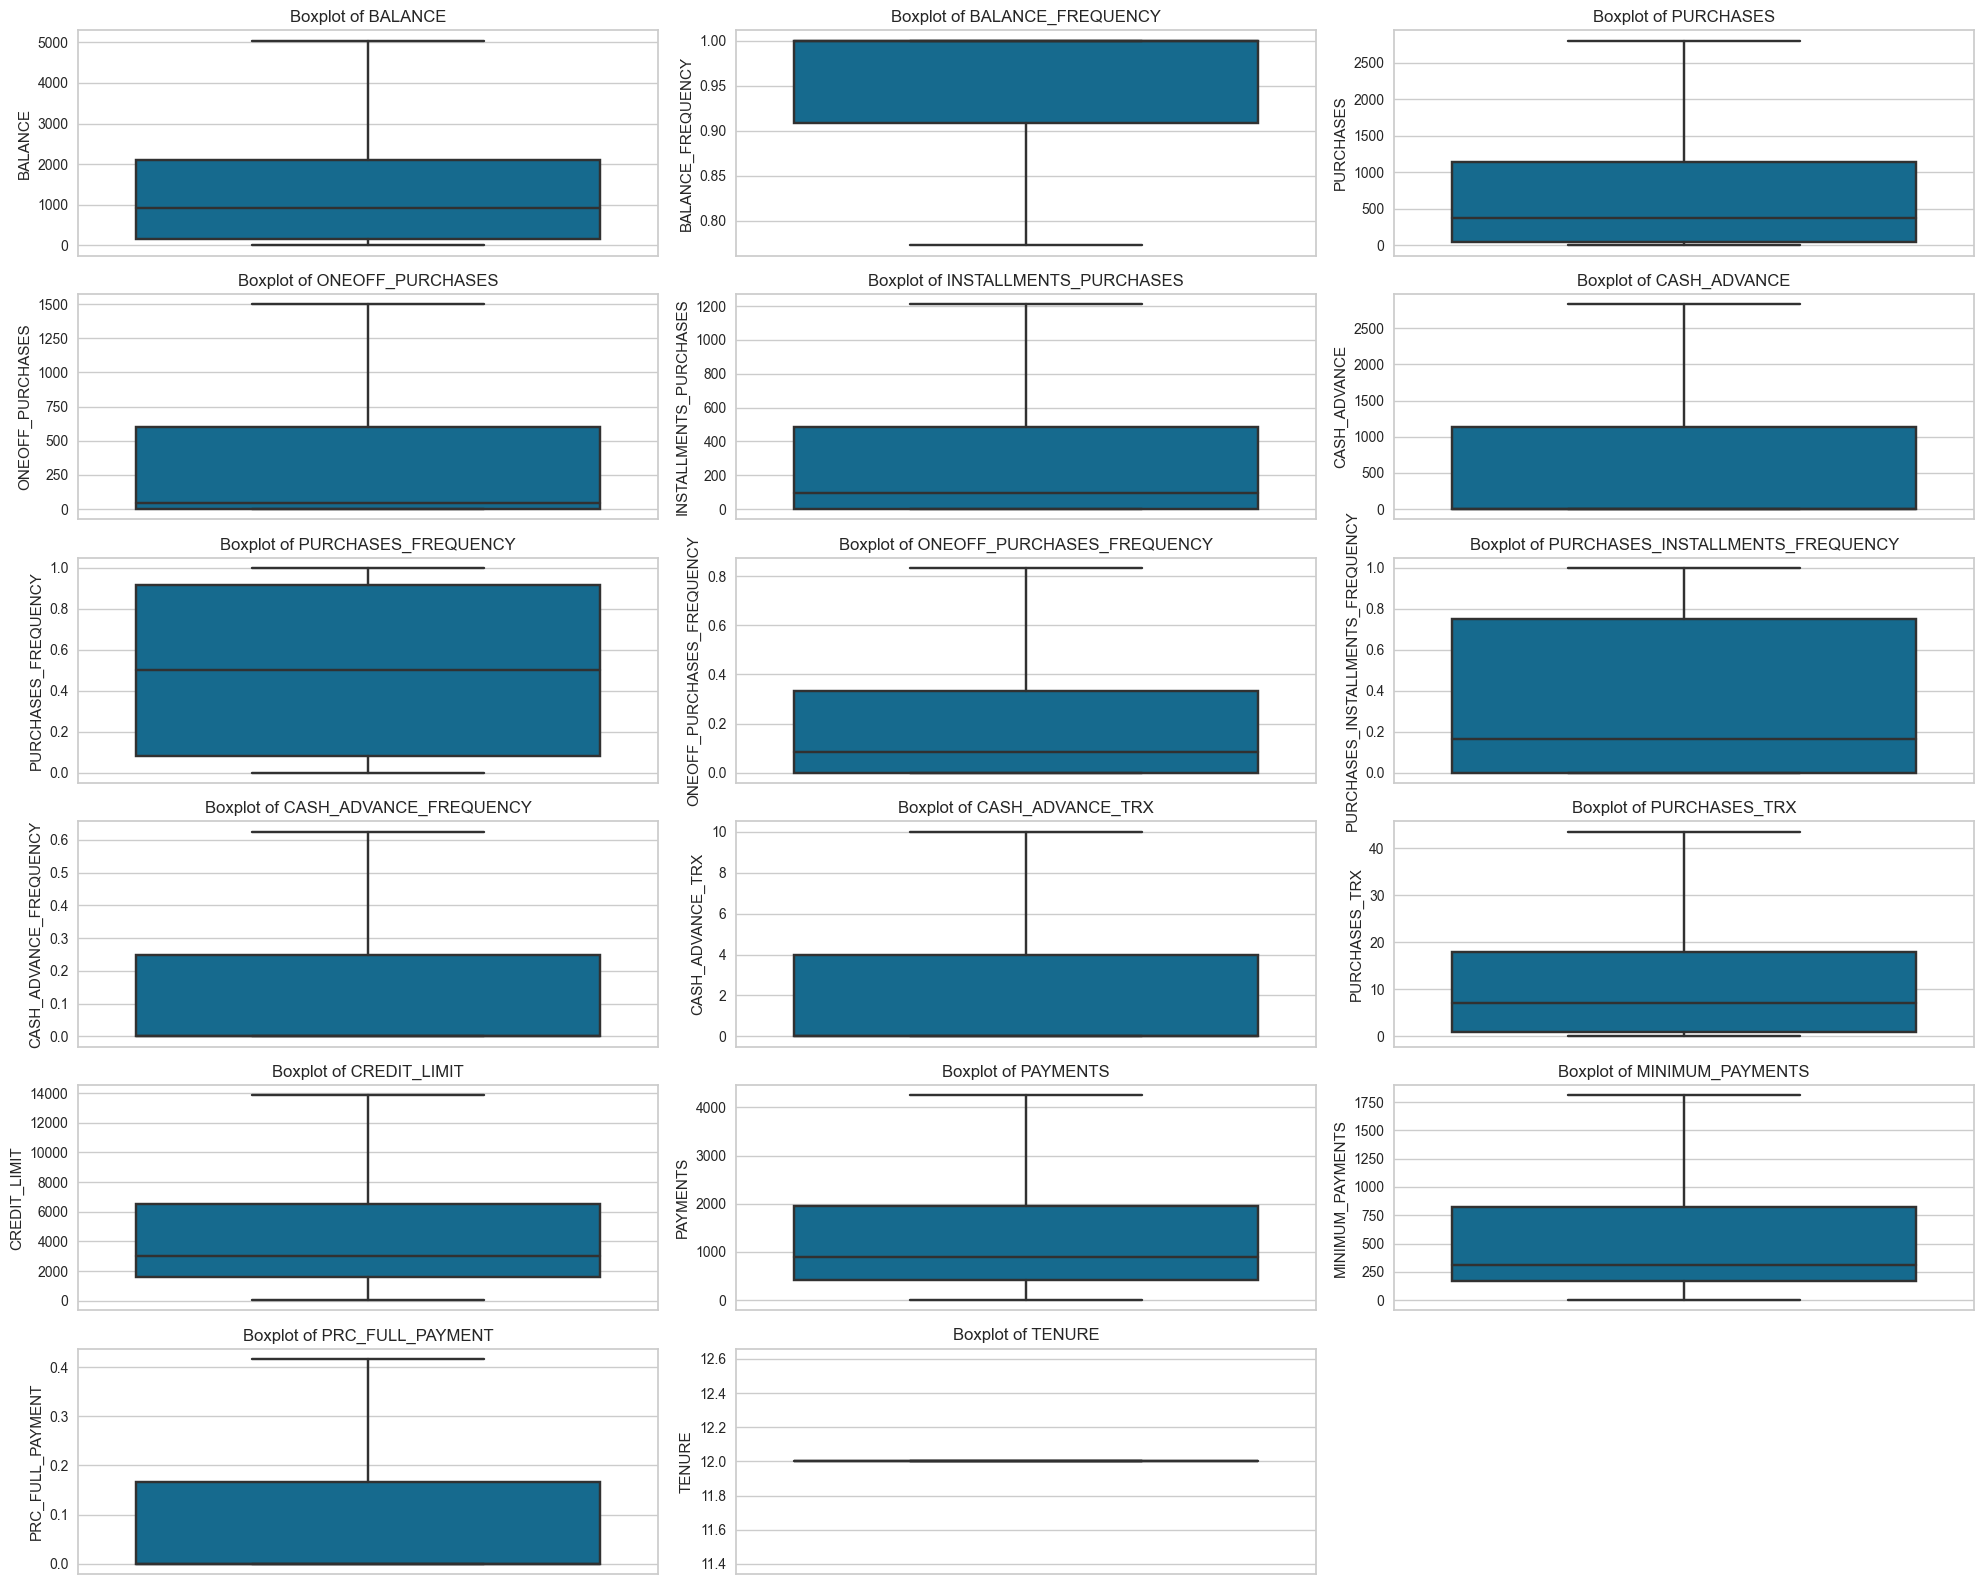

In [35]:
plt.figure(figsize = (20,16))
Features = card.columns
for i in range(len(Features)):
    plt.subplot(6,3, i + 1)
    sns.boxplot(y = card[Features[i]], data = card)
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()

In [36]:
card.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40000,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.00000,2830.963725,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.00000,0.000000,1.000000,0.833333,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.00000,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
5,1809.828751,1.000000,1333.28,0.00,1210.36875,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.0,1800.0,1400.057770,1809.995839,0.000000,12.0


In [88]:
dataframe = card

In [37]:
# Standarisasi pada dataset 
std_card = pd.DataFrame(StandardScaler().fit_transform(card), columns=card.columns)
std_card.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8636.0
mean,-5.265717e-17,6.647968e-16,-6.582147e-17,1.020233e-16,2.929055e-16,2.879689e-17,6.582147e-18,-6.582147e-17,8.227683e-18,-2.961966e-17,-4.237257e-17,4.278395e-17,7.898576e-17,-8.556791e-17,-3.291073e-17,1.053143e-16,0.0
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,0.0
min,-9.172833e-01,-1.900785e+00,-8.400807e-01,-6.934480e-01,-7.491423e-01,-6.759645e-01,-1.236139e+00,-7.132856e-01,-9.265216e-01,-7.211393e-01,-7.043358e-01,-8.856236e-01,-1.292439e+00,-1.086843e+00,-1.026563e+00,-6.294799e-01,0.0
25%,-8.222803e-01,-3.969001e-01,-7.920474e-01,-6.934480e-01,-7.491423e-01,-6.759645e-01,-1.028455e+00,-7.132856e-01,-9.265216e-01,-7.211393e-01,-7.043358e-01,-8.121816e-01,-8.366775e-01,-7.610356e-01,-7.246931e-01,-6.294799e-01,0.0
50%,-3.291209e-01,6.056898e-01,-4.242867e-01,-6.081817e-01,-5.165161e-01,-6.759645e-01,9.968862e-03,-4.089523e-01,-5.078338e-01,-7.211393e-01,-7.043358e-01,-3.715299e-01,-4.250220e-01,-3.888249e-01,-4.689676e-01,-6.294799e-01,0.0
75%,4.331990e-01,6.056898e-01,4.291928e-01,4.418566e-01,4.390773e-01,4.408415e-01,1.048393e+00,5.040511e-01,9.575697e-01,6.487257e-01,4.586936e-01,4.363316e-01,6.041167e-01,4.320706e-01,4.466555e-01,4.174165e-01,0.0
max,2.316418e+00,6.056898e-01,2.261053e+00,2.144814e+00,2.221407e+00,2.116051e+00,1.256077e+00,2.330056e+00,1.585600e+00,2.703523e+00,2.203238e+00,2.309101e+00,2.765308e+00,2.221730e+00,2.203678e+00,1.987761e+00,0.0


### Reduksi dimensi menggunakan PCA (Principal Component Analysis)

PCA (Principal Component Analysis) adalah metode yang digunakan dalam analisis data untuk mengurangi dimensi variabel dengan memproyeksikan data ke ruang yang lebih rendah. Metode ini termasuk dalam bagian preprocessing atau pra-pemrosesan data sebelum dilakukan proses clustering.

Dalam konteks clustering, PCA dapat digunakan sebagai langkah pertama untuk mengurangi dimensi data dan mempertahankan informasi yang paling penting. Dengan mengurangi dimensi, PCA dapat membantu mengatasi masalah dalam clustering yang disebabkan oleh "curse of dimensionality".

In [38]:
pca = PCA(n_components=0.9, random_state=42)
pca.fit(std_card)
PC_names = ['PC'+str(x) for x in range(1,len(pca.components_)+1)]
pca_data = pd.DataFrame(pca.transform(std_card), columns=PC_names)

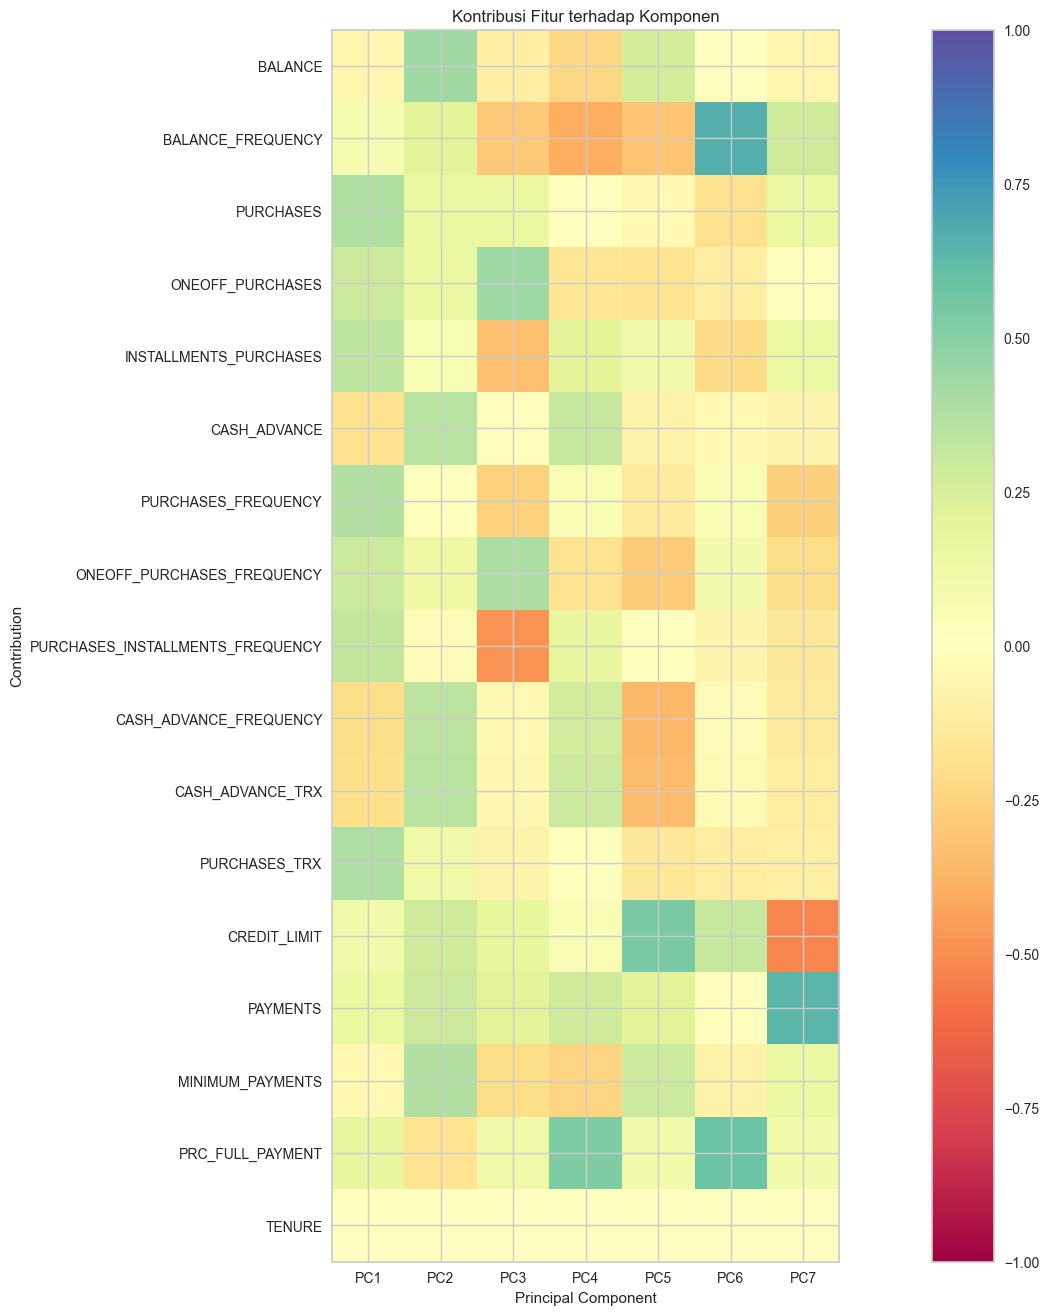

In [39]:
fig, ax = plt.subplots(figsize=(24, 16))
plt.imshow(pca.components_.T,
           cmap="Spectral",
           vmin=-1,
           vmax=1,
          )
plt.yticks(range(len(std_card.columns)), std_card.columns)
plt.xticks(range(len(pca_data.columns)), pca_data.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Kontribusi Fitur terhadap Komponen")
plt.colorbar()

In [40]:
card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   float64
 11  PURCHASES_TRX                     8636 non-null   float64
 12  CREDIT

# Clustering The Data

**KMeans Clustering** adalah salah satu teknik dalam machine learning yang digunakan untuk mengelompokkan data ke dalam beberapa kelompok atau cluster berdasarkan kesamaan fitur atau karakteristik tertentu. Teknik ini termasuk dalam kategori unsupervised learning, di mana tidak ada label atau target yang diberikan pada data. Proses KMeans clustering dimulai dengan menentukan jumlah cluster yang diinginkan. Kemudian, algoritma akan secara acak memilih titik-titik awal sebagai pusat cluster. Setiap data kemudian akan dikelompokkan ke dalam cluster terdekat berdasarkan jarak Euclidean antara data dan pusat cluster. Pusat cluster kemudian akan diperbarui dengan menghitung rata-rata dari semua data yang termasuk dalam cluster tersebut. Proses ini akan terus berlanjut hingga tidak ada lagi perubahan dalam pengelompokkan data.

C:\Users\kenny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kenny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kenny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kenny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

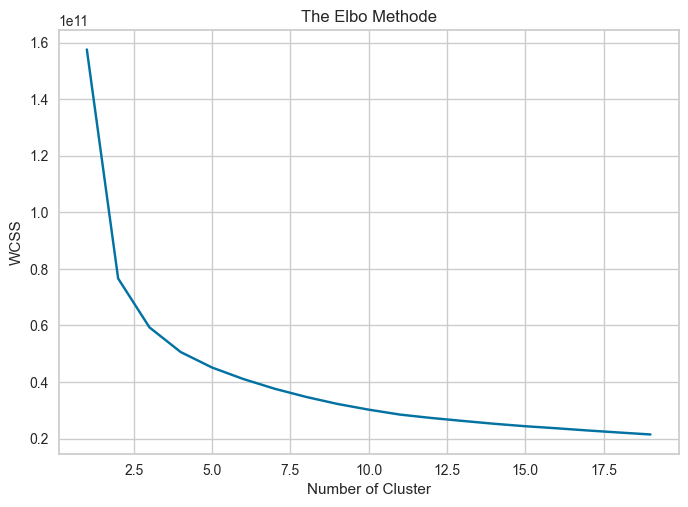

In [76]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(card)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 20), wcss, 'bx-')
plt.title('The Elbo Methode')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

# Evaluasi Model

In [80]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 0)

In [81]:
y_kmeans = kmeans.fit_predict(card)

C:\Users\kenny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [82]:
y_kmeans

array([0, 5, 6, ..., 0, 0, 0])

In [83]:
y_kmeans.shape

(8636,)

In [84]:
y_kmeans = y_kmeans.reshape(len(y_kmeans), 1)

In [85]:
y_kmeans

array([[0],
       [5],
       [6],
       ...,
       [0],
       [0],
       [0]])

In [86]:
y_kmeans.shape

(8636, 1)

In [89]:
bx = np.concatenate((y_kmeans, dataframe), axis = 1)

In [90]:
dataframe.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'LABELS'],
      dtype='object')

In [94]:
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,LABELS
0,40.900749,0.818182,95.40,0.00,95.40000,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,1
1,3202.467416,0.909091,0.00,0.00,0.00000,2830.963725,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,3
2,2495.148862,1.000000,773.17,773.17,0.00000,0.000000,1.000000,0.833333,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,2
4,817.714335,1.000000,16.00,16.00,0.00000,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1
5,1809.828751,1.000000,1333.28,0.00,1210.36875,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.0,1800.0,1400.057770,1809.995839,0.000000,12.0,0


# Kesimpulan

1. Analisis korelasi diperlukan untuk memahami  hubungan dan pola antara kolom-kolom dalam dataset. Korelasi positif: PURCHASES dan ONEOFF_PURCHASES, Korelasi Negatif: CASH_ADVANCE_FREQUENCY dan PURCHASES_FREQUENCY, Korelasi Lemah: CASH_ADVANCE_FREQUENCY dan TENURE.
2. Pada Preprocessing Data outlier dan PCA memiliki peran penting dalam analisis data. Deteksi dan penanganan **outlier** membantu menjaga keakuratan analisis dan model, sedangkan **PCA** membantu mengurangi dimensi data dan mengidentifikasi pola utama.
3. Data transaksi pengguna telah berhasil untuk dikelompokkan menggunakan Algoritma **KMeans**.
4. Untuk menemukan jumlah cluster optimal yang digunakan dalam proses pengelompokan data transaksi pengguna dengan algoritma KMeans, kami menerapkan **'Elbow Method'**.
5. Kami mengimplementasikan teknik pengurangan dimensi PCA (Principal Component Analysis) untuk mengatasi kompleksitas data dan membuat grafik clustering yang lebih informatif.